In [1]:
#Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return(0.5 + 0.5 * np.tanh(2 * 10 * x))

def TriSolve(a, b, c, r):
    n = np.size(b)
    beta = np.zeros(n)
    rho = np.zeros(n)
    solutions = np.zeros(n)
    
    beta[0] = b[0]
    rho[0] = r[0]
    
    for j in range(1, n):
        beta[j] = b[j] - ( a[j-1] / beta[j-1] ) * c[j-1]
        rho[j] = r[j] - ( a[j-1] / beta[j-1] ) * rho[j-1]
    
    solutions[n-1] = rho[n-1]/beta[n-1]
    
    for j in range(n-1):
        solutions[n-j-2] = (rho[n-j-2] - c[n-j-2] * solutions[n-j-1])/beta[n-j-2]
        
    return solutions

def h(start, end):
    return(end - start)

In [2]:
# Main Solver - Takes points, function values at those points, and computes the second derivatives to fit
# a natural cubic spline at a given point.

def NatCubicSpline(xvalue, x, fx):
    
    n = np.size(x)
    
    b = np.zeros(n)
    a = np.zeros(n-1)
    c = np.zeros(n-1)
    r = np.zeros(n)
    
    for j in range(n):
        if(j == 0 or j == n-1):
            b[j] = 1
        else:
            b[j] = 2 * ( h(x[j-1], x[j]) + h(x[j], x[j+1]) )
    
    for j in range(1, n-2):
        a[j] = h(x[j], x[j+1])
        
    c = a
    
    for j in range(n):
        if(j == 0 or j == n-1):
            r[j] = 0
        else:
            r[j] = 6 * ( ( fx[j+1] - fx[j] )/h(x[j], x[j+1])  - ( fx[j] - fx[j-1] )/h(x[j-1], x[j]) )
    
    second = TriSolve(a, b, c, r)
    
    pos = 0
    
    if(xvalue < x[-1]):
        j = 0
        while(x[j] < xvalue):
            j = j+1
        pos = j
        spline = fx[pos-1] + ((fx[pos] - fx[pos-1])/(x[pos] - x[pos-1]) - second[pos]/6 * (x[pos] - x[pos-1]) - second[pos-1] * (x[pos] - x[pos-1])/3) * (xvalue - x[pos-1]) + second[pos-1]/2 * (xvalue - x[pos-1]) ** 2 + ((second[pos] - second[pos-1])/(6 * (x[pos] - x[pos-1]))) * (xvalue - x[pos-1]) ** 3
    else:
        print("Point not in desired interval!")
    return spline

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


Text(0, 0.5, 'y')

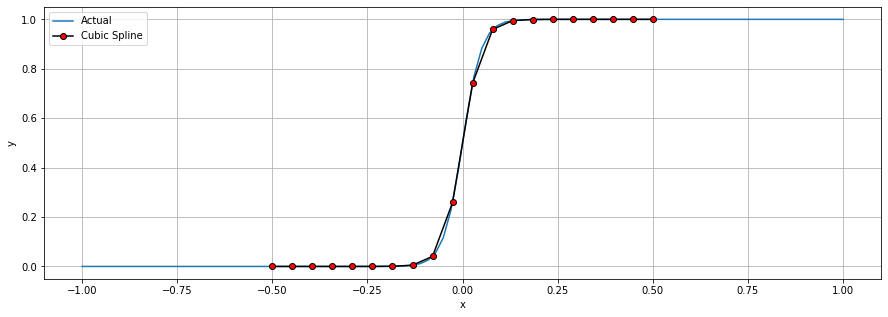

In [3]:
### Plotting

%time

values = np.linspace(-1, 1, 100)
points = np.linspace(-0.5, 0.5, 20)
fx = f(values)
approximations = np.zeros_like(points)
for i in range(np.size(approximations)):
    #print(i)
    approximations[i] = NatCubicSpline(points[i], values, fx)

actual = f(points)

fig = plt.figure()
fig.set_size_inches(15, 5)
plt.plot(values, fx, label='Actual')
plt.plot(points, approximations, 'ko-', mfc='r', label='Cubic Spline')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

---

In [4]:
### Comparing with scipy
from scipy.interpolate import interp1d

cubic_interp = interp1d(points, f(points), kind='cubic')
cubic_results = cubic_interp(points)

Text(0.5, 1.0, 'Interpolating using Cubic Splines Interpolant')

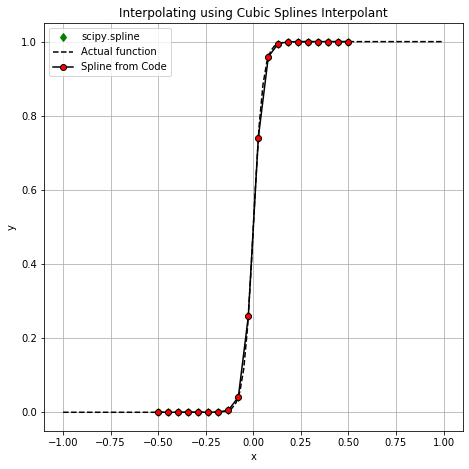

In [5]:
# Plotting the Cubic Splines Interpolant
fig = plt.figure()
fig.set_size_inches(7.5, 7.5)
plt.plot(points, cubic_results, 'gd', label = 'scipy.spline')
#plt.plot(points, f(points), 'r*', label = 'f(x_i)')
plt.plot(values, f(values), 'k--', label = 'Actual function')
plt.plot(points, approximations, 'ko-', mfc='r', label='Spline from Code')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Interpolating using Cubic Splines Interpolant')

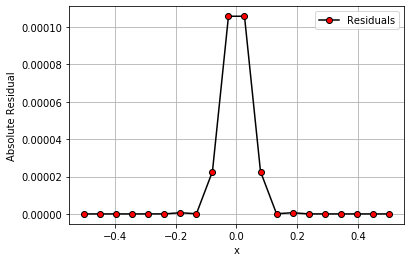

In [20]:
### Seeing how good our code is compared to scipy.spline

plt.plot(points, np.abs(approximations - cubic_results), 'ko-', mfc = 'r', label='Residuals')
plt.xlabel('x')
plt.ylabel('Absolute Residual')
plt.legend()
plt.grid(True)